In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data = data.drop(['Time'], axis=1)

In [7]:
X = data.drop(['Class'], axis=1).values
Y = data['Class'].values

In [8]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
train_x, test_x, train_y, test_y = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=21
)

In [10]:
train_x = train_x[train_y == 0]
print("Training data shape (only normal transactions):", train_x.shape)

Training data shape (only normal transactions): (227462, 29)


In [11]:
input_dim = train_x.shape[1]
input_layer = layers.Input(shape=(input_dim,))

In [13]:
encoded = layers.Dense(14, activation='relu')(input_layer)
encoded = layers.Dense(7, activation='relu')(encoded)
bottleneck = layers.Dense(3, activation='relu')(encoded)

In [14]:
decoded = layers.Dense(7, activation='relu')(bottleneck)
decoded = layers.Dense(14, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

In [15]:
autoencoder = Model(inputs=input_layer, outputs=decoded)

In [16]:
autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [17]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 29)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 14)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 14)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 29)             │           435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,124 (4.39 KB)

 Trainable params: 1,124 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = autoencoder.fit(
    train_x, train_x,
    epochs=5,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
711/711 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0051 - val_loss: 0.0016
Epoch 2/5
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 3/5
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/5
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/5
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0013 - val_loss: 0.0012


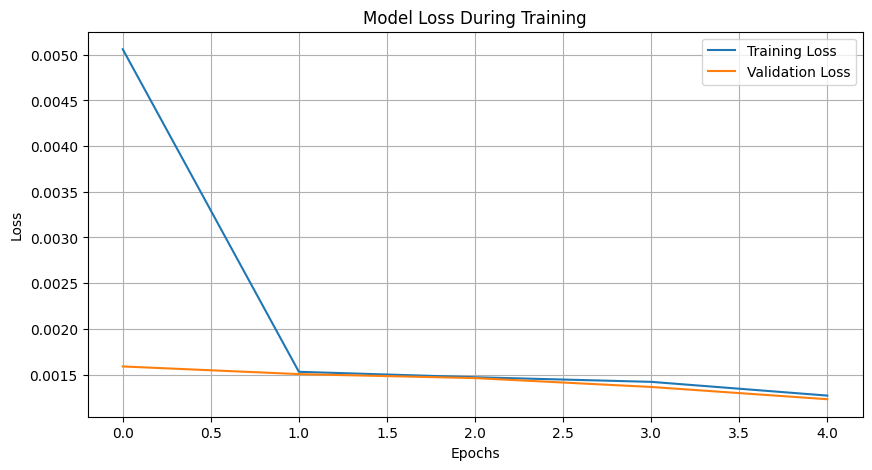

In [19]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [20]:
X_test_pred = autoencoder.predict(test_x)
mse = np.mean(np.power(test_x - X_test_pred, 2), axis=1)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


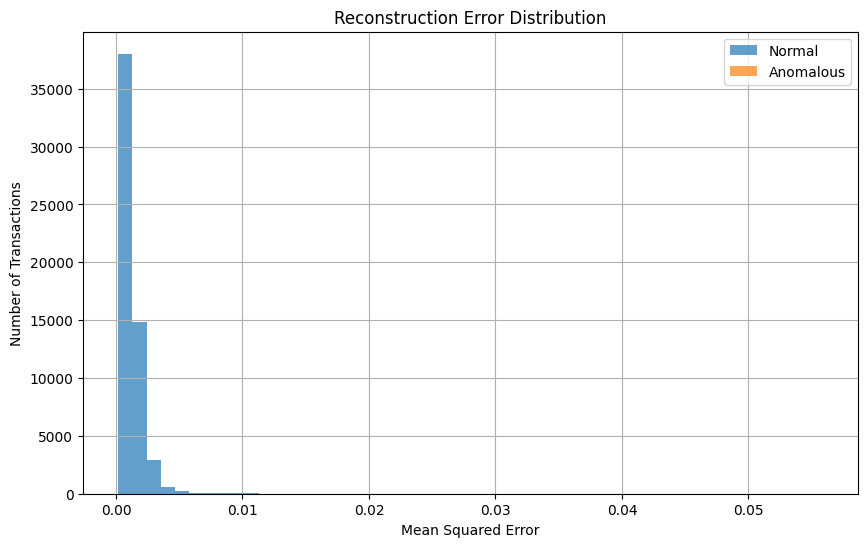

In [21]:
plt.figure(figsize=(10,6))

normal_error = mse[test_y == 0]
anomalous_error = mse[test_y == 1]

plt.hist(normal_error, bins=50, alpha=0.7, label='Normal')
plt.hist(anomalous_error, bins=50, alpha=0.7, label='Anomalous')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Mean Squared Error')
plt.ylabel('Number of Transactions')
plt.legend()
plt.grid()
plt.show()

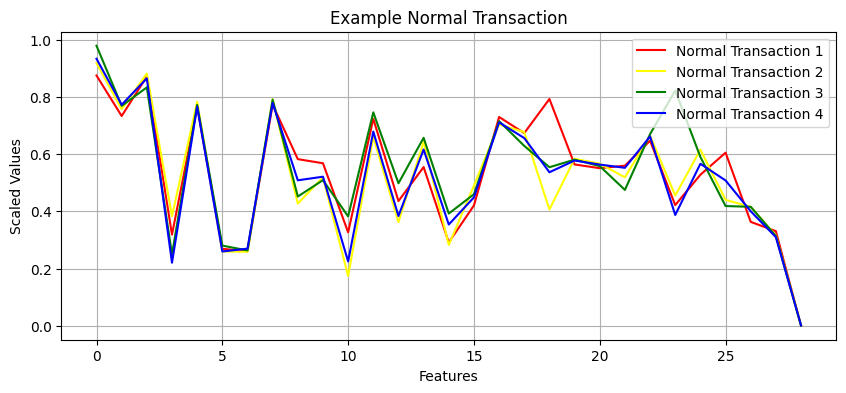

In [22]:
plt.figure(figsize=(10,4))
plt.plot(test_x[test_y==0][0], label="Normal Transaction 1", color='red')
plt.plot(test_x[test_y==0][1], label="Normal Transaction 2", color='yellow')
plt.plot(test_x[test_y==0][2], label="Normal Transaction 3", color='green')
plt.plot(test_x[test_y==0][3], label="Normal Transaction 4", color='blue')
plt.title("Example Normal Transaction")
plt.xlabel("Features")
plt.ylabel("Scaled Values")
plt.grid()
plt.legend()
plt.show()

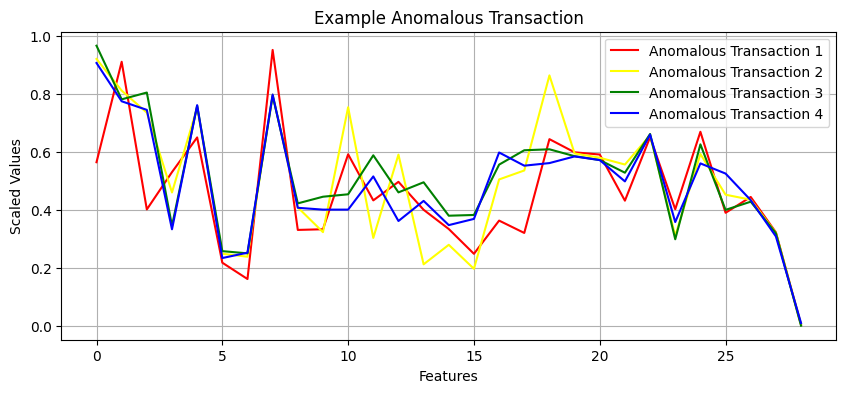

In [23]:
plt.figure(figsize=(10,4))
plt.plot(test_x[test_y==1][0], label="Anomalous Transaction 1", color='red')
plt.plot(test_x[test_y==1][1], label="Anomalous Transaction 2", color='yellow')
plt.plot(test_x[test_y==1][2], label="Anomalous Transaction 3", color='green')
plt.plot(test_x[test_y==1][3], label="Anomalous Transaction 4", color='blue')
plt.title("Example Anomalous Transaction")
plt.xlabel("Features")
plt.ylabel("Scaled Values")
plt.grid()
plt.legend()
plt.show()

In [24]:
threshold = np.percentile(normal_error, 95)
print("Suggested threshold (95 percentile of normal error):", threshold)

Suggested threshold (95 percentile of normal error): 0.0026619078426686196


In [25]:
y_pred = mse > threshold
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56853
           1       0.03      0.86      0.06       109

    accuracy                           0.95     56962
   macro avg       0.52      0.91      0.52     56962
weighted avg       1.00      0.95      0.97     56962



In [26]:
fraud_data = data[data['Class']==1]
fraud_sample = fraud_data.sample(n=1)
fraud_index =  fraud_sample.index[0]
print(fraud_index)

96341


In [27]:
import numpy as np
fraud_sample = X_scaled[fraud_index].reshape(1, -1)
fraud_recon = autoencoder.predict(fraud_sample)
fraud_mse = np.mean(np.power(fraud_sample - fraud_recon, 2))

if fraud_mse > threshold:
    print("Fraud")
else:
    print("Normal")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Normal
